In [ ]:
import pandas as pd
from google.colab import files
import io

# อัปโหลดไฟล์
uploaded = files.upload()

# โหลดไฟล์เข้า DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))

# แสดงผล
df.head()
print(df.columns)


Saving Customer-Churn-Records.csv to Customer-Churn-Records.csv
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')


In [ ]:
# Import Libraries สำหรับ Data Processing
import pandas as pd
import numpy as np

# Import Libraries สำหรับการทำ Visualization
import matplotlib.pyplot as plt

# Import Tools สำหรับ Train-Test Split และ Data Preprocessing
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Import Machine Learning Models (Decision Tree & Random Forest)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Metrics สำหรับประเมินประสิทธิภาพของโมเดล
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    roc_auc_score, roc_curve,
    classification_report
)


In [ ]:
# โหลดชุดข้อมูล
df = pd.read_csv("Customer-Churn-Records.csv")

# แสดงข้อมูล 5 แถวแรก
df.head()

# ตรวจสอบข้อมูลเบื้องต้น
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

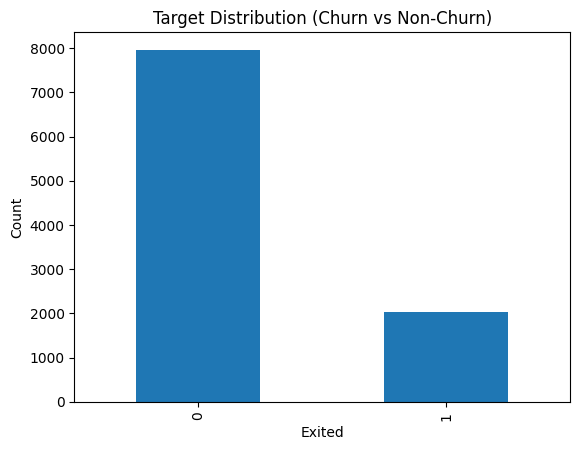

In [ ]:
# ดูการกระจายของ Target (Exited)
df["Exited"].value_counts().plot(kind="bar")

plt.title("Target Distribution (Churn vs Non-Churn)")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()


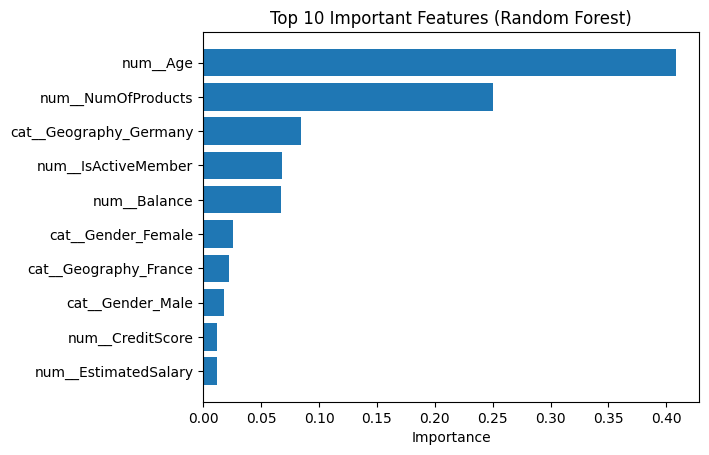

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ดึงโมเดลจาก pipeline
model = rf_pipeline.named_steps["model"]

# ดึงชื่อ feature หลัง preprocess
feature_names = rf_pipeline.named_steps["preprocess"].get_feature_names_out()

# สร้าง DataFrame importance
importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": model.feature_importances_
})

# เรียงลำดับจากมากไปน้อย
importance = importance.sort_values(by="Importance", ascending=False)

# เอา top 10
top_features = importance.head(10)

# วาดกราฟ
plt.figure()
plt.barh(top_features["Feature"], top_features["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

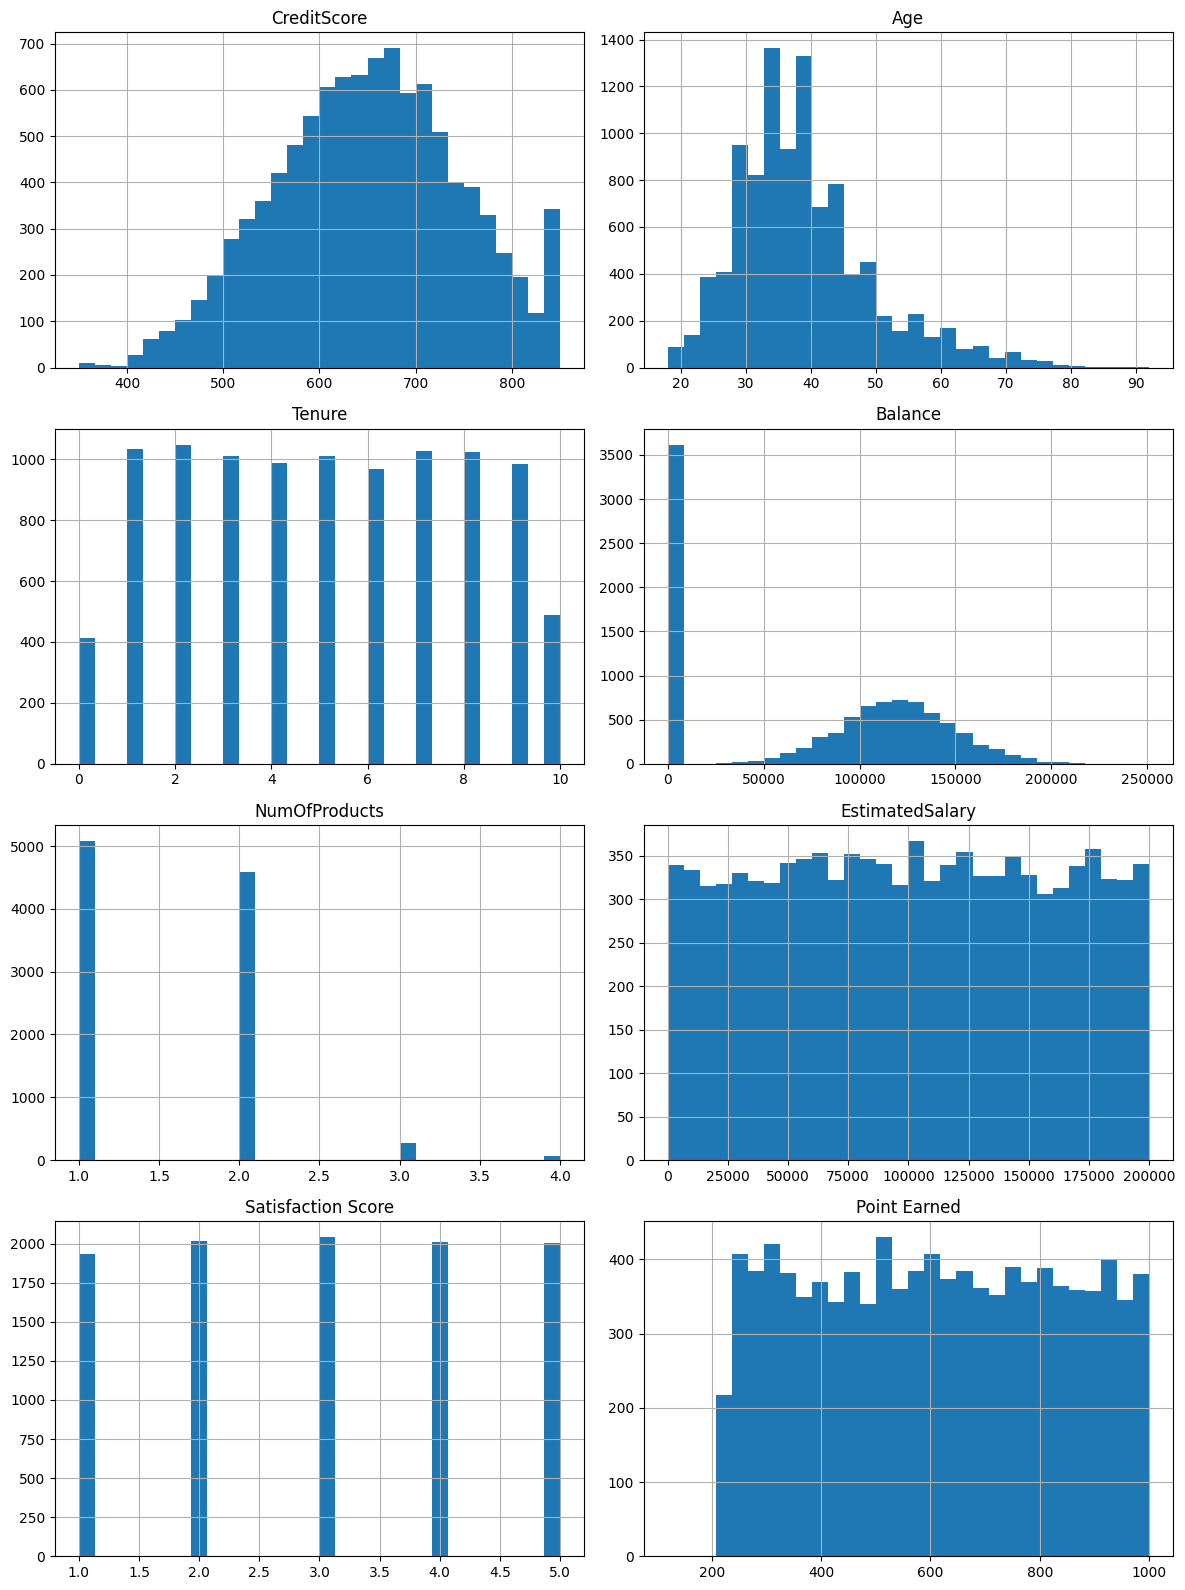

In [ ]:
# เลือกคอลัมน์ตัวเลขสำหรับดูการกระจายตัว
num_cols = [
    "CreditScore", "Age", "Tenure", "Balance",
    "NumOfProducts", "EstimatedSalary",
    "Satisfaction Score", "Point Earned"
]

# สร้าง Histogram ของตัวแปรเชิงตัวเลข
plt.figure(figsize=(12, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    df[col].hist(bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
# แยก Features และ Target
X = df.drop([
    "Exited",
    "RowNumber",
    "CustomerId",
    "Surname",
    "Complain"
], axis=1)

y = df["Exited"]

# แบ่งข้อมูล Train/Test (คงสัดส่วนคลาสด้วย stratify)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
y.value_counts()


,count
Exited,
0,7962
1,2038


In [ ]:
# แยกคอลัมน์ตัวเลขและตัวแปรเชิงหมวดหมู่
num_features = X.select_dtypes(include=["int64", "float64"]).columns
cat_features = X.select_dtypes(include=["object"]).columns

# สร้างชุด Preprocessing (Scaling สำหรับตัวเลข + One-Hot Encoding สำหรับตัวอักษร)
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)


In [ ]:
# สร้างโมเดล Decision Tree ด้วย Pipeline
dt_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(
        max_depth=5,
        min_samples_leaf=20,
        random_state=42
    ))
])

# ฝึกโมเดล Decision Tree
dt_pipeline.fit(X_train, y_train)

dt_pred = dt_pipeline.predict(X_test)
dt_proba = dt_pipeline.predict_proba(X_test)[:,1]

print("===== Decision Tree =====")
print("Train Accuracy:", dt_pipeline.score(X_train, y_train))
print("Test Accuracy :", dt_pipeline.score(X_test, y_test))
print("ROC-AUC:", roc_auc_score(y_test, dt_proba))
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, dt_pred))



===== Decision Tree =====
Train Accuracy: 0.857375
Test Accuracy : 0.857
ROC-AUC: 0.8561488508720071

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1592
           1       0.79      0.41      0.54       408

    accuracy                           0.86      2000
   macro avg       0.83      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000


Confusion Matrix:
[[1547   45]
 [ 241  167]]


In [ ]:
# สร้างโมเดล Random Forest ด้วย Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        n_estimators=200,
        max_depth=5,
        min_samples_leaf=20,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

# ฝึกโมเดล
rf_pipeline.fit(X_train, y_train)

# ทำนาย
rf_pred = rf_pipeline.predict(X_test)
rf_proba = rf_pipeline.predict_proba(X_test)[:,1]

# ประเมินผล
print("\n===== Random Forest =====")
print("Train Accuracy:", rf_pipeline.score(X_train, y_train))
print("Test Accuracy :", rf_pipeline.score(X_test, y_test))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


===== Random Forest =====
Train Accuracy: 0.79525
Test Accuracy : 0.7845
ROC-AUC: 0.8580186471573553

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1592
           1       0.48      0.77      0.59       408

    accuracy                           0.78      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.78      0.80      2000


Confusion Matrix:
[[1255  337]
 [  94  314]]


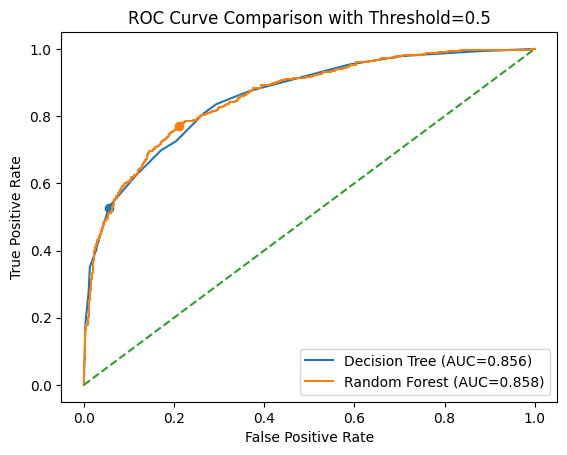



จากกราฟ ROC พบว่า Random Forest มีค่า AUC สูงกว่าเล็กน้อย (0.858 > 0.856) 
และมีค่า Recall ของ class 1 สูงกว่าอย่างชัดเจน แม้ Accuracy จะต่ำกว่า Decision Tree 
แต่ Random Forest เหมาะสมกับงาน Churn มากกว่า เนื่องจากสามารถตรวจจับลูกค้าที่จะยกเลิกบริการได้ดีกว่า 
และมี Train-Test gap ต่ำ แสดงว่าไม่เกิด Overfitting




In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# คำนวณ ROC
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_proba)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_proba)

# หา AUC
dt_auc = roc_auc_score(y_test, dt_proba)
rf_auc = roc_auc_score(y_test, rf_proba)

# ---- หา index ของ threshold ใกล้ 0.5 ----
dt_idx = np.argmin(np.abs(dt_thresholds - 0.5))
rf_idx = np.argmin(np.abs(rf_thresholds - 0.5))

# ดึงค่าจุด threshold 0.5
dt_fpr_05 = dt_fpr[dt_idx]
dt_tpr_05 = dt_tpr[dt_idx]

rf_fpr_05 = rf_fpr[rf_idx]
rf_tpr_05 = rf_tpr[rf_idx]

# ---- วาดกราฟ ----
plt.figure()

plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC={dt_auc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC={rf_auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")

# plot จุด threshold 0.5
plt.scatter(dt_fpr_05, dt_tpr_05)
plt.scatter(rf_fpr_05, rf_tpr_05)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison with Threshold=0.5")
plt.legend()

plt.show()


print("""

จากกราฟ ROC พบว่า Random Forest มีค่า AUC สูงกว่าเล็กน้อย (0.858 > 0.856)
และมีค่า Recall ของ class 1 สูงกว่าอย่างชัดเจน แม้ Accuracy จะต่ำกว่า Decision Tree
แต่ Random Forest เหมาะสมกับงาน Churn มากกว่า เนื่องจากสามารถตรวจจับลูกค้าที่จะยกเลิกบริการได้ดีกว่า
และมี Train-Test gap ต่ำ แสดงว่าไม่เกิด Overfitting

""")

In [ ]:
# ทดสอบความเสถียรของโมเดลด้วย Stratified Shuffle plit  Test (10 รอบ)
def stability_test(pipeline, X, y):
    scores = []
    sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

    for train_idx, test_idx in sss.split(X, y):
        X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
        y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

        pipeline.fit(X_tr, y_tr)
        y_proba = pipeline.predict_proba(X_te)[:, 1]
        scores.append(roc_auc_score(y_te, y_proba))

    return np.mean(scores), np.std(scores)


In [ ]:
# ทดสอบความเสถียรของโมเดลทั้งสอง
dt_mean, dt_std = stability_test(dt_pipeline, X, y)
rf_mean, rf_std = stability_test(rf_pipeline, X, y)

# แสดงผลความเสถียร (ค่าเฉลี่ยและส่วนเบี่ยงเบน)
print("Decision Tree  - Mean ROC-AUC:", dt_mean, "Std:", dt_std)
print("Random Forest  - Mean ROC-AUC:", rf_mean, "Std:", rf_std)


Decision Tree  - Mean ROC-AUC: 0.8368120662145582 Std: 0.010186770769565251
Random Forest  - Mean ROC-AUC: 0.8454840413542979 Std: 0.009435170331107794


In [ ]:
print("""
จากการทดสอบด้วย Stratified Shuffle Split จำนวน 10 ครั้ง พบว่า
Random Forest มีค่า Mean ROC-AUC สูงกว่า Decision Tree (0.848 > 0.838)
และมีค่า Standard Deviation ต่ำกว่า แสดงให้เห็นว่า Random Forest มีความแม่นยำและเสถียรภาพสูงกว่า
สอดคล้องกับทฤษฎี Bagging ที่ช่วยลด Variance ของโมเดล
""")


จากการทดสอบด้วย Stratified Shuffle Split จำนวน 10 ครั้ง พบว่า 
Random Forest มีค่า Mean ROC-AUC สูงกว่า Decision Tree (0.848 > 0.838) 
และมีค่า Standard Deviation ต่ำกว่า แสดงให้เห็นว่า Random Forest มีความแม่นยำและเสถียรภาพสูงกว่า 
สอดคล้องกับทฤษฎี Bagging ที่ช่วยลด Variance ของโมเดล

